In [124]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge

In [64]:
#Car price dataset

df_initial = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')
df_initial.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


Data preparation

- Select only next features: 'Make, Model, Year, Engine HP, Engine Cylinders, Transmission Type, Vehicle Style, highway MPG, city mpg' and transform their names 
- Fill in the missing values of the selected features with 0.
- Rename MSRP variable to price.

In [65]:
df = df_initial[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg']]
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18


In [66]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
dtype: int64

In [67]:
df = df.fillna(0)
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
dtype: int64

In [68]:
df_initial.rename(columns = {'MSRP':'price'}, inplace = True)
df_initial.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


Question 1

What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [69]:
df['transmission_type'].value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

In [70]:
df['transmission_type'].value_counts()[:1].index.tolist()

['AUTOMATIC']

In [71]:
df.transmission_type.mode()

0    AUTOMATIC
Name: transmission_type, dtype: object

Answer: AUTOMATIC

Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

In [72]:
df_num = df[['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']]

df_num.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.338714,-0.040708,0.258240,0.198171
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000


<Axes: >

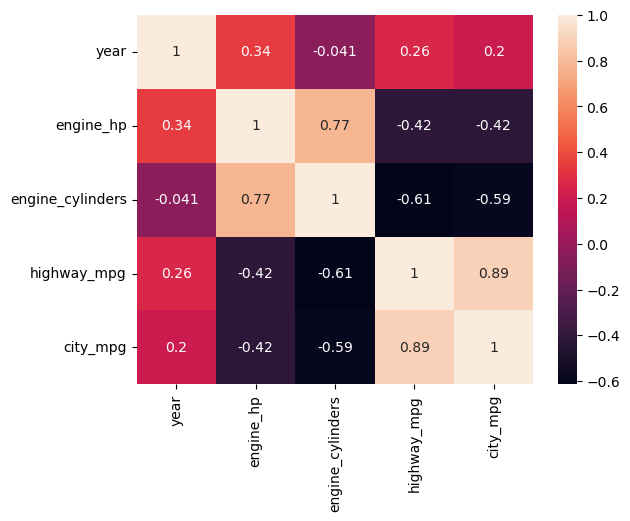

In [73]:
sns.heatmap(df_num.corr(), annot=True)

In [74]:
df_num.corr().unstack().sort_values(ascending = False)[:10]

year              year                1.000000
engine_hp         engine_hp           1.000000
highway_mpg       highway_mpg         1.000000
engine_cylinders  engine_cylinders    1.000000
city_mpg          city_mpg            1.000000
                  highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
engine_hp         year                0.338714
dtype: float64

Answer: highway_mpg and city_mpg

Make price binary
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [75]:
mean = df_initial.price.mean()
df_initial['above_average'] = np.where(df_initial['price']>mean,1,0)
df_initial['above_average']

0        1
1        1
2        0
3        0
4        0
        ..
11909    1
11910    1
11911    1
11912    1
11913    0
Name: above_average, Length: 11914, dtype: int32

In [76]:
df_initial.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,price,above_average
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,1
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,1
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,0


Split the data
- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (price) is not in your dataframe.

In [77]:
df_new = df_initial[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'above_average']]
df_new.columns = df_new.columns.str.replace(' ', '_').str.lower()
df_new = df_new.fillna(0)
df_new.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [78]:
df_train_full, df_test = train_test_split(df_new, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [79]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [80]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

Question 3

Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

Which of these variables has the lowest mutual information score?
- make
- model
- transmission_type
- vehicle_style

In [81]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

In [82]:
cat_var = [['make', 'model', 'transmission_type', 'vehicle_style']]

for elem in cat_var:
    df_mi = df_train[elem].apply(calculate_mi)
    df_mi = df_mi.sort_values(ascending=True).to_frame(name='MI')
    print(df_mi)

                         MI
transmission_type  0.020958
vehicle_style      0.084143
make               0.239769
model              0.462344


Answer: transmission_type

Question 4
- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?
- 0.60
- 0.72
- 0.84
- 0.95

In [83]:
# dataset preparing
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [84]:
train_dict = df_train.to_dict(orient='records')

In [85]:
train_dict[0]

{'make': 'Mitsubishi',
 'model': 'Endeavor',
 'year': 2011,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'AUTOMATIC',
 'vehicle_style': '4dr SUV',
 'highway_mpg': 19,
 'city_mpg': 15}

In [86]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [87]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [88]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [89]:
model.intercept_[0]

-0.3601926991321202

In [ ]:
model.coef_[0].round(3)

In [91]:
y_pred_proba = model.predict_proba(X_val)[:, 1]

In [92]:
y_pred_proba.round(3)

array([0.001, 0.996, 0.   , ..., 0.   , 0.99 , 0.987])

In [93]:
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [94]:
acc = accuracy_score(y_val, y_pred)
acc_rounded = np.round(acc,2)
acc_rounded

0.95

Answer: 0.95

Question 5 
- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?
- year
- engine_hp
- transmission_type
- city_mpg

Note: the difference doesn't have to be positive



In [95]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [96]:
features = ['year', 'engine_hp', 'transmission_type', 'city_mpg']

Using rounded accuracy

In [105]:
orig_acc = acc_rounded

for elem in features:
    subset = list(df_train)
    subset.remove(elem)

    train_dict = df_train[subset].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)

    print(elem, orig_acc, score, orig_acc - score)

year 0.95 0.9483843894250944 0.0016156105749055572
engine_hp 0.95 0.9248845992446496 0.025115400755350348
transmission_type 0.95 0.9458665547629039 0.004133445237096023
city_mpg 0.95 0.9324381032312211 0.01756189676877884


Answer: year

Using not rounded accuracy

In [106]:
orig_acc = acc

for elem in features:
    subset = list(df_train)
    subset.remove(elem)

    train_dict = df_train[subset].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)

    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)

    print(elem, orig_acc, score, orig_acc - score)

year 0.9471254720939991 0.9483843894250944 -0.0012589173310952884
engine_hp 0.9471254720939991 0.9248845992446496 0.022240872849349502
transmission_type 0.9471254720939991 0.9458665547629039 0.0012589173310951773
city_mpg 0.9471254720939991 0.9324381032312211 0.014687368862777994


Answer: transmission_type

The answer will vary depending on rounding of the original accuracy

Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn.
- We'll need to use the original column price. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
- This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
- Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?
- 0
- 0.01
- 0.1
- 1
- 10

Note: If there are multiple options, select the smallest alpha.

In [113]:
#Preparing dataset
df_q6 = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

In [114]:
df_q6 = df_q6[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']]
df_q6.columns = df_q6.columns.str.replace(' ', '_').str.lower()
df_q6.rename(columns = {'msrp':'price'}, inplace = True)
df_q6 = df_q6.fillna(0)
df_q6.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [115]:
df_q6['price']=np.log1p(df_q6['price'])
df_q6.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,10.739349
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,10.612779
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,10.500977
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,10.290483
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,10.448744


In [116]:
df_train_full, df_test = train_test_split(df_q6, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [117]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [119]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [120]:
del df_train['price']
del df_val['price']
del df_test['price']

In [121]:
train_dict = df_train.to_dict(orient='records')

In [122]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [125]:
for elem in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=elem, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(elem, round(score, 3))
     

d:\DS_ML\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.487


d:\DS_ML\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.487


d:\DS_ML\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.487


d:\DS_ML\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.487
10 0.487


d:\DS_ML\sample_project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Answer: 0